<a href="https://colab.research.google.com/github/erobertson-machine-learning/lstm_1984/blob/master/lstm_1984.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation with LSTM for books
- Source Video https://www.youtube.com/watch?v=ZMudJXhsUpY&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S&index=6
- Data http://gutenberg.net.au/ebooks01/0100021.txt
- Data Childrens Storries https://venturebeat.com/2016/02/18/facebook-releases-1-6gb-data-set-of-childrens-stories-for-training-its-ai/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading Data

In [0]:
import re

In [3]:
# Load in the data
data_file = open('drive/My Drive/Colab Notebooks/data/1984', 'r').readlines()
data_file[:4]

['It was a bright cold day in April, and the clocks were striking thirteen.\n',
 'Winston Smith, his chin nuzzled into his breast in an effort to escape the\n',
 'vile wind, slipped quickly through the glass doors of Victory Mansions,\n',
 'though not quickly enough to prevent a swirl of gritty dust from entering\n']

In [4]:
data_file = ''.join(data_file)
data_file = re.sub(r'\n\n+', ' <br> ', data_file).lower()
data_file = re.sub(r'\n', ' ', data_file)
data_file = re.sub(r' +', ' ', data_file).lower()
len(data_file)

591940

In [5]:
data_file[:200]

'it was a bright cold day in april, and the clocks were striking thirteen. winston smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors '

In [0]:
## Text now loaded as single cleaned up string

## Tokenization

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
total_words = 3000
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts([ data_file ])
print('Total Words Tokenized: ', len(tokenizer.word_index))

Total Words Tokenized:  9251


In [9]:
 token_sequence = tokenizer.texts_to_sequences( [data_file] )
 token_sequence[0][:20]

[9,
 6,
 3,
 1456,
 555,
 144,
 8,
 1892,
 4,
 1,
 22,
 31,
 913,
 13,
 2753,
 55,
 13,
 914,
 8,
 45]

## Data Generation

In [0]:
sequence_length = 20

In [11]:
# Genrating lists of words as input sequences
train_data = []
for i in range ( len ( token_sequence[0] )):
  # Text long enough not to worry about padding, dont start till you got long enough sequence
  if i < sequence_length:
    continue
  train_data.append( token_sequence[0][i-sequence_length:i] )
print('Total training cases: ', len(train_data))

Total training cases:  97871


In [12]:
train_data_x = [ a[:-1] for a in train_data ]
train_data_y = [ [a[-1]] for a in train_data ]

print( train_data_x[0], train_data_y[0])

[9, 6, 3, 1456, 555, 144, 8, 1892, 4, 1, 22, 31, 913, 13, 2753, 55, 13, 914, 8] [45]


In [0]:
from tensorflow.keras import utils

In [14]:
# catigorical_y_values
train_data_y_onehot = utils.to_categorical( train_data_y, num_classes=total_words+1)
train_data_y_onehot.shape

(97871, 3001)

In [0]:
import numpy as np

In [16]:
train_data_x = np.array( train_data_x )
train_data_x.shape

(97871, 19)

## Building a LSTM Model

In [17]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
model = tf.keras.Sequential([
     tf.keras.layers.Embedding(total_words+1, 128, input_length=sequence_length-1),
     tf.keras.layers.LSTM( 20 ),
     tf.keras.layers.Dense( total_words+1, activation='softmax')                         
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 128)           384128    
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                11920     
_________________________________________________________________
dense_1 (Dense)              (None, 3001)              63021     
Total params: 459,069
Trainable params: 459,069
Non-trainable params: 0
_________________________________________________________________


In [26]:
num_epochs = 20
history = model.fit(train_data_x, train_data_y_onehot, epochs=num_epochs, verbose=2)

Epoch 1/20
3059/3059 - 23s - loss: 6.0909 - accuracy: 0.0669
Epoch 2/20
3059/3059 - 22s - loss: 5.7125 - accuracy: 0.1030
Epoch 3/20
3059/3059 - 23s - loss: 5.4794 - accuracy: 0.1241
Epoch 4/20
3059/3059 - 22s - loss: 5.3184 - accuracy: 0.1376
Epoch 5/20
3059/3059 - 22s - loss: 5.1936 - accuracy: 0.1451
Epoch 6/20
3059/3059 - 23s - loss: 5.0882 - accuracy: 0.1517
Epoch 7/20
3059/3059 - 22s - loss: 4.9959 - accuracy: 0.1592
Epoch 8/20
3059/3059 - 22s - loss: 4.9181 - accuracy: 0.1657
Epoch 9/20
3059/3059 - 22s - loss: 4.8493 - accuracy: 0.1712
Epoch 10/20
3059/3059 - 22s - loss: 4.7886 - accuracy: 0.1772
Epoch 11/20
3059/3059 - 22s - loss: 4.7346 - accuracy: 0.1823
Epoch 12/20
3059/3059 - 22s - loss: 4.6857 - accuracy: 0.1863
Epoch 13/20
3059/3059 - 22s - loss: 4.6412 - accuracy: 0.1903
Epoch 14/20
3059/3059 - 22s - loss: 4.6003 - accuracy: 0.1927
Epoch 15/20
3059/3059 - 22s - loss: 4.5628 - accuracy: 0.1972
Epoch 16/20
3059/3059 - 22s - loss: 4.5275 - accuracy: 0.1999
Epoch 17/20
3059/

## Visualize Training

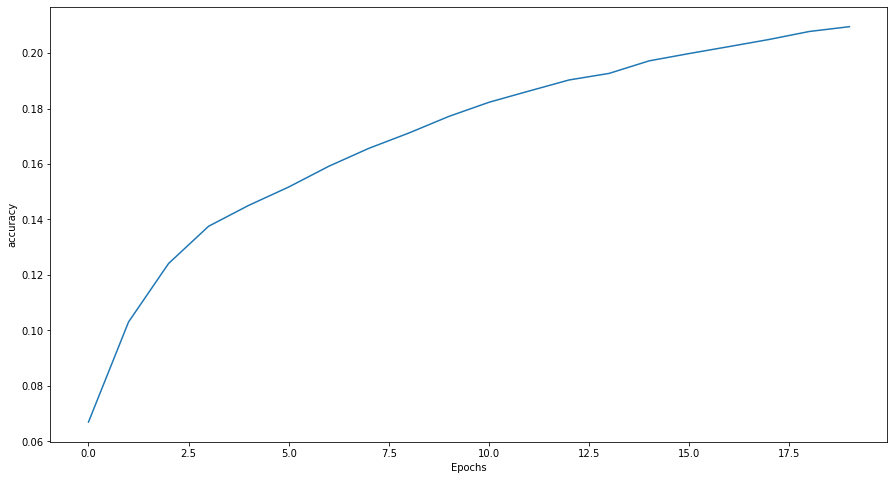

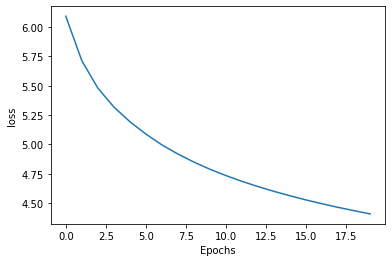

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,8))

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Test out the model

In [0]:
def predict_next( input_words ):
  sequence = np.array(tokenizer.texts_to_sequences( [input_words])[0][-99:])
  print( sequence.shape )
  predicted_token = model.predict( sequence )
  predicted_index = np.argmax(predicted_token[0])
  print(predicted_index)
  return tokenizer.sequences_to_texts([[predicted_index]])

In [29]:
start_text = 'it was a bright cold day in april, and the clocks were striking thirteen. winston smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of victory mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him. <br> the hallway smelt of boiled cabbage and old rag mats. at one end of it a coloured poster, too large for indoor display, had been tacked to the wall. it depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. winston made for the stairs. it was no use trying the lift. even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. it was part of the economy drive in preparation for hate week. the flat was seven flights up, and winston, who was thirty-nine and had a varicose ulcer above his right ankle, went slowly, resting several times on the way. on each landing, opposite the lift-shaft, the poster with the enormous face gazed from the wall. it was one of those pictures which are so contrived that the eyes follow you about when you move. big brother is watching you, the caption beneath it ran.'
next_sentence = []
for i in range ( 20 ):
  next_word = predict_next(start_text)
  start_text = start_text + ' ' + next_word[0]
  next_sentence.append( next_word[0] )
print( next_sentence )


(99,)
1
(99,)
7
(99,)
521
(99,)
1742
(99,)
2618
(99,)
2659
(99,)
66
(99,)
2464
(99,)
331
(99,)
1244
(99,)
1074
(99,)
264
(99,)
1742
(99,)
521
(99,)
1
(99,)
1
(99,)
8
(99,)
280
(99,)
521
(99,)
1742
['the', 'he', 'consciousness', 'trusted', 'southward', 'sye', 'thought', 'tablet', 'floor', 'yelled', "charrington's", 'police', 'trusted', 'consciousness', 'the', 'the', 'in', "'yes", 'consciousness', 'trusted']
